In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import torchvision.transforms as transforms
import numpy
import matplotlib.pyplot as plt

In [65]:
# 读取数据
mnist_train = torchvision.datasets.FashionMNIST(root='E:/Datasets/FashionMNIST', train=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='E:/Datasets/FashionMNIST', train=False, transform=transforms.ToTensor())

batch_size = 256
train_iter = Data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_iter = Data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

In [2]:
# 定义模型
class MLPNet(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hidden):
        super(MLPNet, self).__init__()
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
        
        self.apply(self._init_params)
        
    def _init_params(self, m):
        if type(m) == nn.Linear:
            nn.init.normal_(m.weight, mean=0, std=0.01)
            nn.init.constant_(m.bias, val=0)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

In [67]:
# 构建模型
num_inputs, num_outputs, num_hidden = 28 * 28, 10, 256
net = MLPNet(num_inputs, num_outputs, num_hidden)

batch_size, lr = 256, 0.1
optimizer = torch.optim.SGD(net.parameters(), lr = lr)
loss = nn.CrossEntropyLoss()

In [68]:
# 测试集准确率计算
def evaluate_accuracy(data_iter, net):
    sum_acc, n = 0.0, 1
    for x, y in data_iter:
        y_hat = net(x)
        sum_acc += (y_hat.argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return sum_acc / n

epoch  1, loss  1.0403, train acc  0.639, test acc  0.737
epoch  2, loss  0.6002, train acc  0.788, test acc  0.805
epoch  3, loss  0.5188, train acc  0.818, test acc  0.811
epoch  4, loss  0.4788, train acc  0.833, test acc  0.821
epoch  5, loss  0.4534, train acc  0.840, test acc  0.766
epoch  6, loss  0.4336, train acc  0.847, test acc  0.832
epoch  7, loss  0.4174, train acc  0.853, test acc  0.844
epoch  8, loss  0.4050, train acc  0.857, test acc  0.838
epoch  9, loss  0.3919, train acc  0.862, test acc  0.849
epoch  10, loss  0.3820, train acc  0.865, test acc  0.850
epoch  11, loss  0.3735, train acc  0.868, test acc  0.848
epoch  12, loss  0.3671, train acc  0.870, test acc  0.854
epoch  13, loss  0.3582, train acc  0.873, test acc  0.858
epoch  14, loss  0.3526, train acc  0.874, test acc  0.858
epoch  15, loss  0.3454, train acc  0.877, test acc  0.855
epoch  16, loss  0.3397, train acc  0.880, test acc  0.859
epoch  17, loss  0.3356, train acc  0.881, test acc  0.842
epoch 

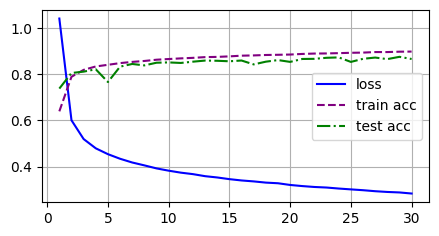

In [69]:
# 训练模型 
num_epochs = 30
loss_list, train_acc_list, test_acc_list = [], [], []

for epoch in range(num_epochs):
    train_l_sum, train_acc_sum, n, m = 0.1, 0.1, 0, 0
    
    for x, y in train_iter:
        y_hat = net(x)
        l = loss(y_hat, y)
        
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
        
        train_l_sum += l.item()
        train_acc_sum += (y_hat.argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
        m += 1
        
    test_acc = evaluate_accuracy(test_iter, net)
    loss_list.append(train_l_sum / m)
    train_acc_list.append(train_acc_sum / n)
    test_acc_list.append(test_acc)
    
    print(f'epoch {epoch + 1: d}, loss {train_l_sum / m: .4f}, train acc {train_acc_sum / n: .3f}, test acc {test_acc: .3f}')

fig, ax = plt.subplots(figsize=[5, 2.5])

ax.plot(range(1, epoch + 2), loss_list, label='loss', color='blue')
ax.plot(range(1, epoch + 2), train_acc_list, label='train acc', color='purple', linestyle='--')
ax.plot(range(1, epoch + 2), test_acc_list, label='test acc', color='green', linestyle='-.')

plt.grid(True)
plt.legend()
plt.show()
    